# **Dependency / Library Installation**

In [ ]:
# @title Run this cell => restart the session => execute the below cells

!pip install -q langchain==0.3.21 \
                huggingface_hub==0.29.3 \
                openai==1.68.2 \
                chromadb==0.6.3 \
                langchain-community==0.3.20 \
                langchain_openai==0.3.10 \
                lark==1.2.2\
                rank_bm25==0.2.2\
                numpy==2.2.4 \
                scipy==1.15.2 \
                scikit-learn==1.6.1 \
                transformers==4.50.0 \
                sentence_transformers==4.0.0 \
                torch==2.6.0+cu124

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 86.1 MB/s eta 

# **Setup**

In [ ]:
#Loading the `config.json` file
import json
import os

# Load the JSON file and extract values
file_name = 'config.json'
with open(file_name, 'r') as file:
    config = json.load(file)
    os.environ['OPENAI_API_KEY'] = config.get("API_KEY") # Loading the API Key
    os.environ["OPENAI_BASE_URL"] = config.get("OPENAI_API_BASE") # Loading the API Base Url



In [ ]:
from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')

In [ ]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# **Retrival**

## **Metadata**

### Method 1 :  Preprocessing, Chunking, and Storing Vectors without Metadata

In [ ]:
from langchain.schema import Document
from langchain.vectorstores import Chroma


documents = [
    Document(
        id=1,
        page_content="Renewable energy is derived from natural processes that are replenished constantly. It includes sources like solar and wind.",
        metadata={}
    ),
    Document(
        id=2,
        page_content="Solar power harnesses the energy from the sunlight. Advances in photovoltaic technology have reduced costs significantly.",
        metadata={}
    ),
    Document(
        id=3,
        page_content="Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.",
        metadata={}
    ),
    Document(
        id=4,
        page_content="Hydroelectric power uses the flow of water to generate electricity, and is one of the oldest forms of renewable energy.",
        metadata={}
    ),
    Document(
        id=5,
        page_content="Geothermal energy exploits the heat from the earth, offering a reliable energy source with minimal environmental impact.",
        metadata={}
    ),
    Document(
        id=6,
        page_content="Biomass energy comes from organic materials and is considered renewable when managed sustainably.",
        metadata={}
    ),
    Document(
        id=7,
        page_content="Energy storage technologies are critical to manage the intermittent nature of solar and wind energy.",
        metadata={}
    ),
    Document(
        id=8,
        page_content="The transition to renewable energy helps reduce greenhouse gas emissions and mitigate climate change.",
        metadata={}
    ),
]




vectorstore = Chroma(

    collection_name = "Renewable_enery_without_Metadata",
    embedding_function=embeddings)

vectorstore.add_documents(documents=documents)


<ipython-input-10-bf528cfbbecf>:51: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(


['1', '2', '3', '4', '5', '6', '7', '8']

In [ ]:
%%time
# This example only specifies a relevant query
ret = vectorstore.as_retriever(enable_limit=True)

question = "How does wind energy work?"
ret.invoke(question)

CPU times: user 11.5 ms, sys: 144 µs, total: 11.6 ms
Wall time: 1.15 s


[Document(metadata={}, page_content='Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.'),
 Document(metadata={}, page_content='Energy storage technologies are critical to manage the intermittent nature of solar and wind energy.'),
 Document(metadata={}, page_content='Renewable energy is derived from natural processes that are replenished constantly. It includes sources like solar and wind.'),
 Document(metadata={}, page_content='Solar power harnesses the energy from the sunlight. Advances in photovoltaic technology have reduced costs significantly.')]

In [ ]:
%%time
question = "Which renewable enegy sources were discoverd during 2025?"
ret.invoke(question)

CPU times: user 14.6 ms, sys: 0 ns, total: 14.6 ms
Wall time: 1.03 s


[Document(metadata={}, page_content='Renewable energy is derived from natural processes that are replenished constantly. It includes sources like solar and wind.'),
 Document(metadata={}, page_content='The transition to renewable energy helps reduce greenhouse gas emissions and mitigate climate change.'),
 Document(metadata={}, page_content='Solar power harnesses the energy from the sunlight. Advances in photovoltaic technology have reduced costs significantly.'),
 Document(metadata={}, page_content='Energy storage technologies are critical to manage the intermittent nature of solar and wind energy.')]

Since the documents do not contain specific years, they are not be able to answer questions requiring that detail accurately. Instead, they simply return the documents with the highest relevance.

### Method 1 :  Preprocessing, Chunking, and Storing Vectors with Metadata

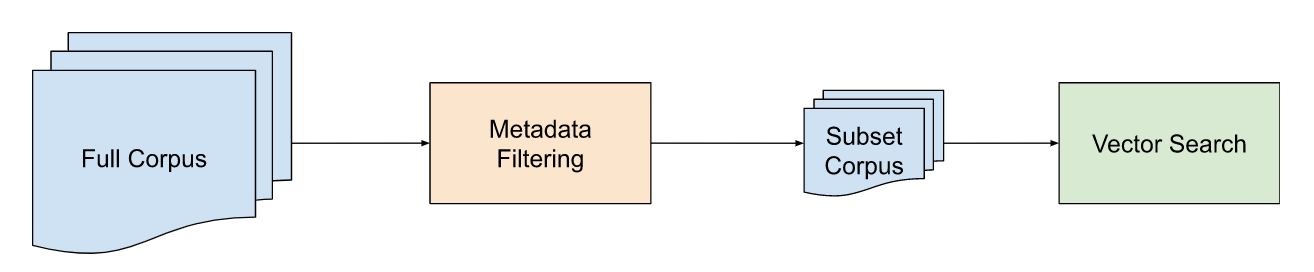

In [ ]:
from langchain.schema import Document
from langchain.vectorstores import Chroma

# Modified documents with metadata
documents_with_metadata = [
    Document(
        id=1,
        page_content="Renewable energy is derived from natural processes that are replenished constantly. It includes sources like solar and wind.",
        metadata={"year": 2023, "topics": "introduction", "subtopic": "renewable energy"}
    ),
    Document(
        id=2,
        page_content="Solar power harnesses the energy from the sunlight. Advances in photovoltaic technology have reduced costs significantly.",
        metadata={"year": 2023, "topics": "solar power"}
    ),
    Document(
        id=3,
        page_content="Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.",
        metadata={"year": 2023, "topics": "wind energy"}
    ),
    Document(
        id=4,
        page_content="Hydroelectric power uses the flow of water to generate electricity, and is one of the oldest forms of renewable energy.",
        metadata={"year": 2024, "topics": "hydroelectric"}
    ),
    Document(
        id=5,
        page_content="Geothermal energy exploits the heat from the earth, offering a reliable energy source with minimal environmental impact.",
        metadata={"year": 2024, "topics": "geothermal"}
    ),
    Document(
        id=6,
        page_content="Biomass energy comes from organic materials and is considered renewable when managed sustainably.",
        metadata={"year": 2025, "topics": "biomass"}
    ),
    Document(
        id=7,
        page_content="Energy storage technologies are critical to manage the intermittent nature of solar and wind energy.",
        metadata={"year": 2025, "topics": "energy storage"}
    ),
    Document(
        id=8,
        page_content="The transition to renewable energy helps reduce greenhouse gas emissions and mitigate climate change.",
        metadata={"year": 2025, "topics": "environment", "subtopic": "policy"}
    )
]


vectorstore_with_metadata = Chroma(
    collection_name="Renewable_enery_with_Metadata",
    embedding_function=embeddings)

vectorstore_with_metadata.add_documents(documents=documents_with_metadata)

['1', '2', '3', '4', '5', '6', '7', '8']

In [ ]:
from langchain.chains.query_constructor.base import AttributeInfo

# Metadata field information
metadata_field_info = [
    AttributeInfo(
        name="year",
        description="The year the document was created or published",
        type="integer",
    ),
    AttributeInfo(
        name="topics",
        description="The main topic or category of the document, such as renewable energy, solar power, etc.",
        type="string",
    ),
    AttributeInfo(
        name="subtopic",
        description="A more specific subcategory of the main topic, if applicable.",
        type="string",
    )
]

document_content_description = "Brief overview of various aspects related to Renewable Enery and differt types of it like Wind, solar, hydroelectric, geothermal energies,...etc"

#### Creating our self-querying retriever
- A self-querying retriever is one that, as the name suggests, has the ability to query itself. Specifically, given any natural language query, the retriever uses a query-constructing LLM chain to write a structured query and then applies that structured query to its underlying vector store. This allows the retriever to not only use the user-input query for semantic similarity comparison with the contents of stored documents but to also extract filters from the user query on the metadata of stored documents and to execute those filters.



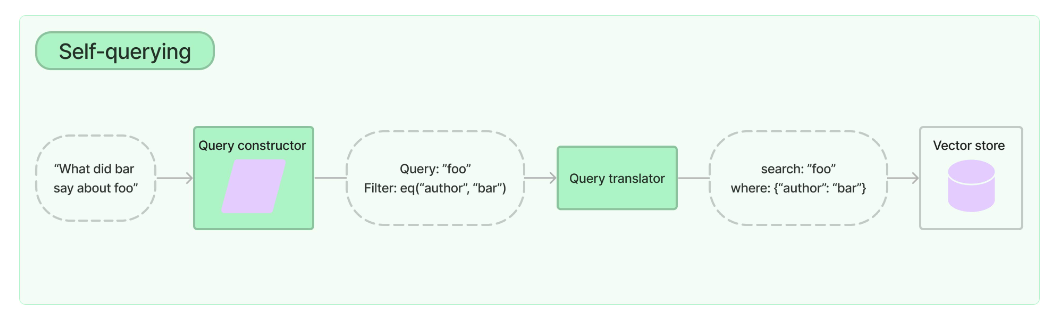

In [ ]:
from langchain.retrievers.self_query.base import SelfQueryRetriever
retriever_with_metadata = SelfQueryRetriever.from_llm(
    llm,
    vectorstore_with_metadata,
    document_content_description,
    metadata_field_info,
    enable_limit=True,
    verbose=True,


)

In [ ]:
%%time
question = "How does wind energy work?"
retriever_with_metadata.get_relevant_documents(question)

<timed exec>:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.


CPU times: user 47 ms, sys: 3.14 ms, total: 50.1 ms
Wall time: 1.83 s


[Document(metadata={'topics': 'wind energy', 'year': 2023}, page_content='Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.'),
 Document(metadata={'subtopic': 'renewable energy', 'topics': 'introduction', 'year': 2023}, page_content='Renewable energy is derived from natural processes that are replenished constantly. It includes sources like solar and wind.'),
 Document(metadata={'topics': 'energy storage', 'year': 2025}, page_content='Energy storage technologies are critical to manage the intermittent nature of solar and wind energy.'),
 Document(metadata={'topics': 'hydroelectric', 'year': 2024}, page_content='Hydroelectric power uses the flow of water to generate electricity, and is one of the oldest forms of renewable energy.')]

In [ ]:
%%time
question = "Which renewable enegy sources were discoverd during 2025?"
retriever_with_metadata.get_relevant_documents(question)

CPU times: user 27.2 ms, sys: 2.14 ms, total: 29.3 ms
Wall time: 2.68 s


[Document(metadata={'topics': 'biomass', 'year': 2025}, page_content='Biomass energy comes from organic materials and is considered renewable when managed sustainably.'),
 Document(metadata={'subtopic': 'policy', 'topics': 'environment', 'year': 2025}, page_content='The transition to renewable energy helps reduce greenhouse gas emissions and mitigate climate change.'),
 Document(metadata={'topics': 'energy storage', 'year': 2025}, page_content='Energy storage technologies are critical to manage the intermittent nature of solar and wind energy.')]

We can retrieve information more quickly and specifically by filtering based on metadata.

## **Hypothetical Questions**

- Hypothetical Question generation involves crafting potential questions that explores various facets of a topic, enhancing the diversity and depth of information retrieval based on the chunk/documents. This technique helps guide the RAG systems to consider a wider range of possible contexts or scenarios, potentially enriching the final output with more comprehensive insights.

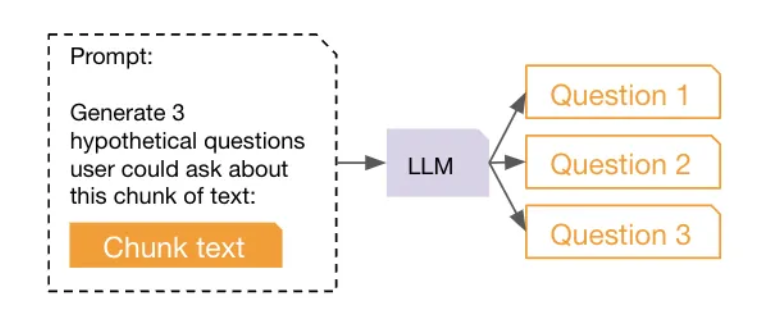

In [ ]:
# Hypothetical Questions

hypothetical_questions_prompt = """
Generate a list of exactly 3 hypothetical questions that the below document could be used to answer:
{doc}
Generate only a list of questions. Do not mention anything before or after the list.
"""


In [ ]:
hypothetical_question_documents = []

In [ ]:
for document in documents_with_metadata:
    try:
        response = llm.invoke(hypothetical_questions_prompt.format(doc=document))
        questions = response.content
    except Exception as e:
        print(e)
        questions = ""

    questions_metadata = {
        'parent_chunk_id': document.id,
        'parent_chunk': document.page_content

    }

    hypothetical_question_documents.append(
        Document(
            id=document.id,
            page_content=questions,
            metadata=questions_metadata
        )
    )


In [ ]:
for d in hypothetical_question_documents:
  print(d.page_content)
  print("Metadata: ", d.metadata)
  print("-"*100)

1. What are the main sources of renewable energy mentioned in the document?
2. How is renewable energy defined in terms of its natural processes?
3. Why is renewable energy considered to be constantly replenished?
Metadata:  {'parent_chunk_id': '1', 'parent_chunk': 'Renewable energy is derived from natural processes that are replenished constantly. It includes sources like solar and wind.'}
----------------------------------------------------------------------------------------------------
1. How has the cost of solar power technology changed in recent years?
2. What is the primary source of energy used in solar power systems?
3. What advancements have been made in photovoltaic technology?
Metadata:  {'parent_chunk_id': '2', 'parent_chunk': 'Solar power harnesses the energy from the sunlight. Advances in photovoltaic technology have reduced costs significantly.'}
----------------------------------------------------------------------------------------------------
1. How is wind energy c

In [ ]:
hypo_question_vectorstore = Chroma(
    collection_name="hypothetical_questions",
    embedding_function=embeddings)


In [ ]:
hypo_question_vectorstore.add_documents(
    ids =  [d.id for d in hypothetical_question_documents],
    documents = hypothetical_question_documents
)

['1', '2', '3', '4', '5', '6', '7', '8']

In [ ]:
hypo_question_ret = hypo_question_vectorstore.as_retriever(
    search_type="similarity",
    search_kwargs={'k': 1}
)

In [ ]:
%%time
question = "How does wind energy work?"
hypo_ques_ret_result = hypo_question_ret.invoke(question)

CPU times: user 9.51 ms, sys: 937 µs, total: 10.4 ms
Wall time: 992 ms


In [ ]:
hypo_ques_ret_result

[Document(metadata={'parent_chunk': 'Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.', 'parent_chunk_id': '3'}, page_content='1. How is wind energy converted into electricity?\n2. What role do turbines play in the generation of wind energy?\n3. What type of energy is harnessed from the wind to produce electricity?')]

**We have now extracted**

**1. Hypothetical Questions**

**2. Parent Chunk for the Hypothetical Questions**

**Now if we want to extract the metadata as well for the parent chunks, here is how we can do it**

In [ ]:
%%time

hypothetical_questions = hypo_ques_ret_result[0].page_content
print(hypothetical_questions)

1. How is wind energy converted into electricity?
2. What role do turbines play in the generation of wind energy?
3. What type of energy is harnessed from the wind to produce electricity?
CPU times: user 55 µs, sys: 7 µs, total: 62 µs
Wall time: 66 µs


In [ ]:
%%time

parent_chunk_id = hypo_ques_ret_result[0].metadata['parent_chunk_id']
parent_data = vectorstore_with_metadata.get(ids=parent_chunk_id)
parent_data

CPU times: user 2.8 ms, sys: 0 ns, total: 2.8 ms
Wall time: 2.98 ms


{'ids': ['3'],
 'embeddings': None,
 'documents': ['Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.'],
 'uris': None,
 'data': None,
 'metadatas': [{'topics': 'wind energy', 'year': 2023}],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

## **Hybrid Search**
- A combination of the Vanilla Retriver & the BM25Retriever


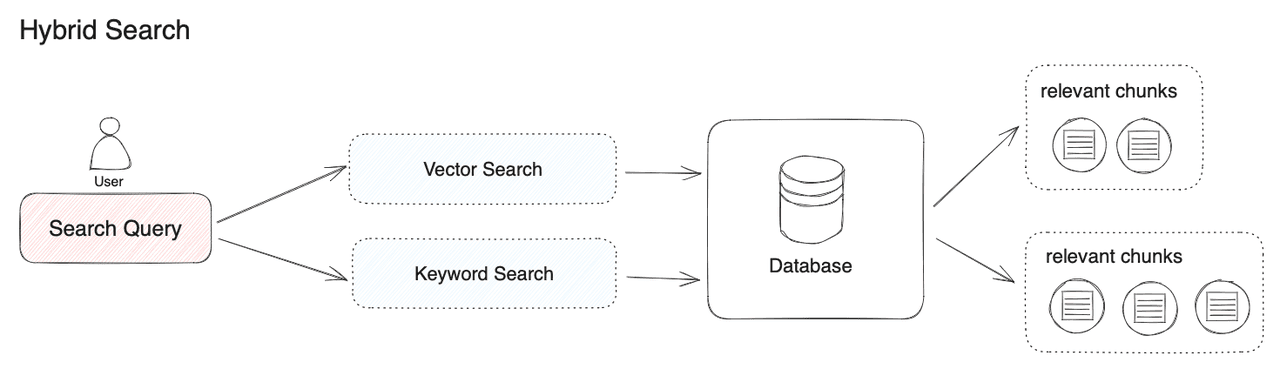

In [ ]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever

# initialize the bm25 retriever
bm25_retriever = BM25Retriever.from_documents(documents)

The **BM25 Retriever** utilizes keyword-based searching. Therefore, when searching for "wind turbines," it searches based on keywords rather than at a semantic level.

In [ ]:
%%time
bm25_retriever.get_relevant_documents("A wind turbine")

CPU times: user 1.27 ms, sys: 34 µs, total: 1.31 ms
Wall time: 8.04 ms


[Document(id='7', metadata={}, page_content='Energy storage technologies are critical to manage the intermittent nature of solar and wind energy.'),
 Document(id='3', metadata={}, page_content='Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.'),
 Document(id='6', metadata={}, page_content='Biomass energy comes from organic materials and is considered renewable when managed sustainably.'),
 Document(id='8', metadata={}, page_content='The transition to renewable energy helps reduce greenhouse gas emissions and mitigate climate change.')]

In [ ]:
%%time

# Searching is based on the keywords and not on the semantics
question = "What are the principles behind wind turbines?"
bm25_retriever.get_relevant_documents(question)

CPU times: user 341 µs, sys: 43 µs, total: 384 µs
Wall time: 389 µs


[Document(id='7', metadata={}, page_content='Energy storage technologies are critical to manage the intermittent nature of solar and wind energy.'),
 Document(id='3', metadata={}, page_content='Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.'),
 Document(id='1', metadata={}, page_content='Renewable energy is derived from natural processes that are replenished constantly. It includes sources like solar and wind.'),
 Document(id='2', metadata={}, page_content='Solar power harnesses the energy from the sunlight. Advances in photovoltaic technology have reduced costs significantly.')]

In [ ]:
# initialize the ensemble retriever (BM25 + Vanilla Retriever)
ensemble_retriever = EnsembleRetriever(retrievers=[bm25_retriever, ret],
                                       weights=[0.5, 0.5])

After implementing **Hybrid Search** (BM25 + Vanilla Retriever), for the same query, different results will be displayed.

This is due to the combination of keyword search and semantic search. (Observe Ids and compare with above BM25 search)

In [ ]:
%%time

question = "A wind turbines"
hybrid_search_result = ensemble_retriever.get_relevant_documents(question)
hybrid_search_result

CPU times: user 11.4 ms, sys: 0 ns, total: 11.4 ms
Wall time: 687 ms


[Document(id='3', metadata={}, page_content='Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.'),
 Document(id='7', metadata={}, page_content='Energy storage technologies are critical to manage the intermittent nature of solar and wind energy.'),
 Document(metadata={}, page_content='Hydroelectric power uses the flow of water to generate electricity, and is one of the oldest forms of renewable energy.'),
 Document(id='6', metadata={}, page_content='Biomass energy comes from organic materials and is considered renewable when managed sustainably.'),
 Document(id='8', metadata={}, page_content='The transition to renewable energy helps reduce greenhouse gas emissions and mitigate climate change.'),
 Document(metadata={}, page_content='Renewable energy is derived from natural processes that are replenished constantly. It includes sources like solar and wind.')]

In [ ]:
%%time

# Searching is based on the keywords as well as semantics
question = "What are the principles behind wind turbines?"
hybrid_search_result = ensemble_retriever.get_relevant_documents(question)
hybrid_search_result

CPU times: user 13.9 ms, sys: 859 µs, total: 14.7 ms
Wall time: 629 ms


[Document(id='3', metadata={}, page_content='Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.'),
 Document(id='7', metadata={}, page_content='Energy storage technologies are critical to manage the intermittent nature of solar and wind energy.'),
 Document(id='2', metadata={}, page_content='Solar power harnesses the energy from the sunlight. Advances in photovoltaic technology have reduced costs significantly.'),
 Document(id='1', metadata={}, page_content='Renewable energy is derived from natural processes that are replenished constantly. It includes sources like solar and wind.'),
 Document(metadata={}, page_content='Hydroelectric power uses the flow of water to generate electricity, and is one of the oldest forms of renewable energy.')]

# **Augmentation**

### **Reranking**

- Reranking is the process of reordering a list of retrieved search results by using more sophisticated models or additional criteria to ensure higher relevance to the user's query. It refines initial rankings, often improving the accuracy and quality of the results presented.

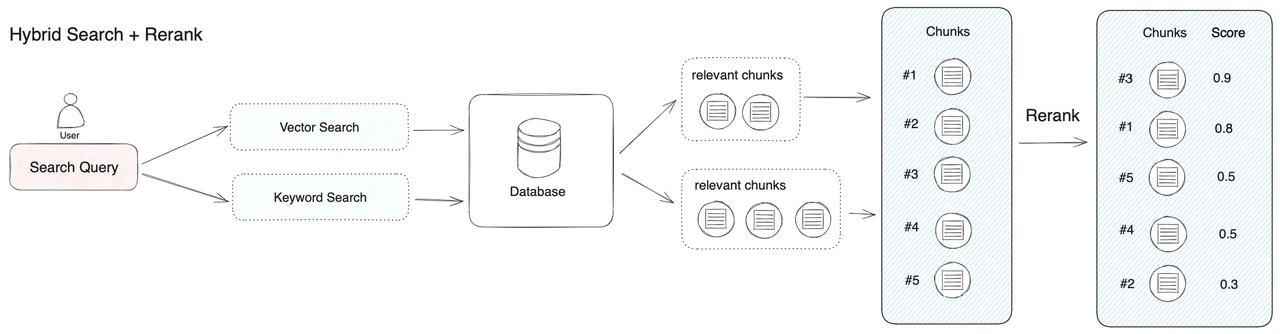

- A Cross-Encoder in the reranking phase is a model that evaluates the relevance of each document to a query by jointly encoding both the query and the document. It is used to refine and improve the initial ranking provided by a simpler retrieval model, ensuring more accurate and contextually relevant results.

In [ ]:
from langchain_community.cross_encoders import HuggingFaceCrossEncoder
crossencoder = HuggingFaceCrossEncoder(model_name="cross-encoder/ms-marco-MiniLM-L-6-v2")

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

Lets check the ranks given by earlier model for the query w.r.t document extracted

In [ ]:
question = "What are the principles behind wind turbines?"
context_query_pairs_for_scoring = [[question, doc_text.page_content] for doc_text in hybrid_search_result]

In [ ]:
%%time
crossencoder.score(context_query_pairs_for_scoring)

CPU times: user 116 ms, sys: 123 ms, total: 239 ms
Wall time: 725 ms


array([ -0.80052984,  -8.450012  , -10.498501  ,  -9.71412   ,
        -9.955534  ], dtype=float32)

We can observe that the chunks are not in the ascending/increasing order

e.g. *(Document 4)* score  **"-9.714121"** should be prefferd over score **"-10.498499"** *(Document 3)*

In [ ]:
from langchain.retrievers.document_compressors import CrossEncoderReranker
reranker = CrossEncoderReranker(model=crossencoder, top_n=5)

In [ ]:
from langchain.retrievers import ContextualCompressionRetriever
reranker_retriever = ContextualCompressionRetriever(
    base_compressor=reranker, base_retriever=ensemble_retriever
)

In [ ]:
%%time
reranked_doc = reranker_retriever.get_relevant_documents(question)
reranked_doc

CPU times: user 31.1 ms, sys: 0 ns, total: 31.1 ms
Wall time: 559 ms


[Document(id='3', metadata={}, page_content='Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.'),
 Document(id='7', metadata={}, page_content='Energy storage technologies are critical to manage the intermittent nature of solar and wind energy.'),
 Document(id='1', metadata={}, page_content='Renewable energy is derived from natural processes that are replenished constantly. It includes sources like solar and wind.'),
 Document(metadata={}, page_content='Hydroelectric power uses the flow of water to generate electricity, and is one of the oldest forms of renewable energy.'),
 Document(id='2', metadata={}, page_content='Solar power harnesses the energy from the sunlight. Advances in photovoltaic technology have reduced costs significantly.')]

- Hybrid Search Execution Time => 578 ms
- Reranking Execution Time => 1.32 s

**Here we can see that the rank/order is different what we have recieved in the hybrid search results**

- Re-ranking is an **Time Consuming & Cost Expensive** process, hence we preffer to do it over the extracted chunks(by similarity search) rather than the whole vectorstore database


### **Context Compression**

- Context compression involves reducing large amounts of text data by filtering out irrelevant information and retaining only the most pertinent details. This process enhances the efficiency and focus of information retrieval and understanding, especially for tasks involving limited processing capacity or specific query constraints.


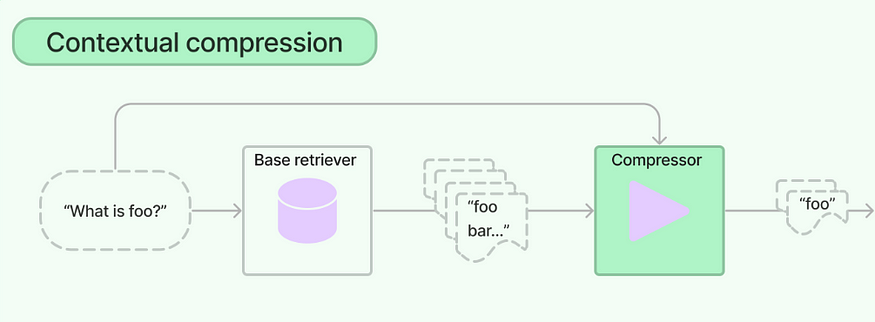

- The `LLMChainExtractor` is a component used within the Langchain framework for information extraction tasks. It utilizes a LLM to process and extract specific data or insights from text inputs.

In [ ]:
from langchain.retrievers.document_compressors import LLMChainExtractor
compressor = LLMChainExtractor.from_llm(llm)

In [ ]:
compression_retriever = ContextualCompressionRetriever(base_compressor=compressor, base_retriever=ensemble_retriever)

In [ ]:
%%time
question = "What are the principles behind wind turbines?"
compressed_docs = compression_retriever.invoke(question)

CPU times: user 60.6 ms, sys: 1.74 ms, total: 62.3 ms
Wall time: 3.35 s


In [ ]:
compressed_docs

[Document(metadata={}, page_content='Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.')]

**After reranking the documents, the context was compressed further, and based on similarity, the most relevant document with respect to the question/query was identified.**

### **Prompt Enhancement / Query Expansion**

- Query expansion, or prompt enhancement, involves modifying a user's original query by adding synonyms, related terms, or rephrased variations to improve search results or comprehension by a language model. This process aims to capture a broader context and increase the chances of retrieving relevant information.

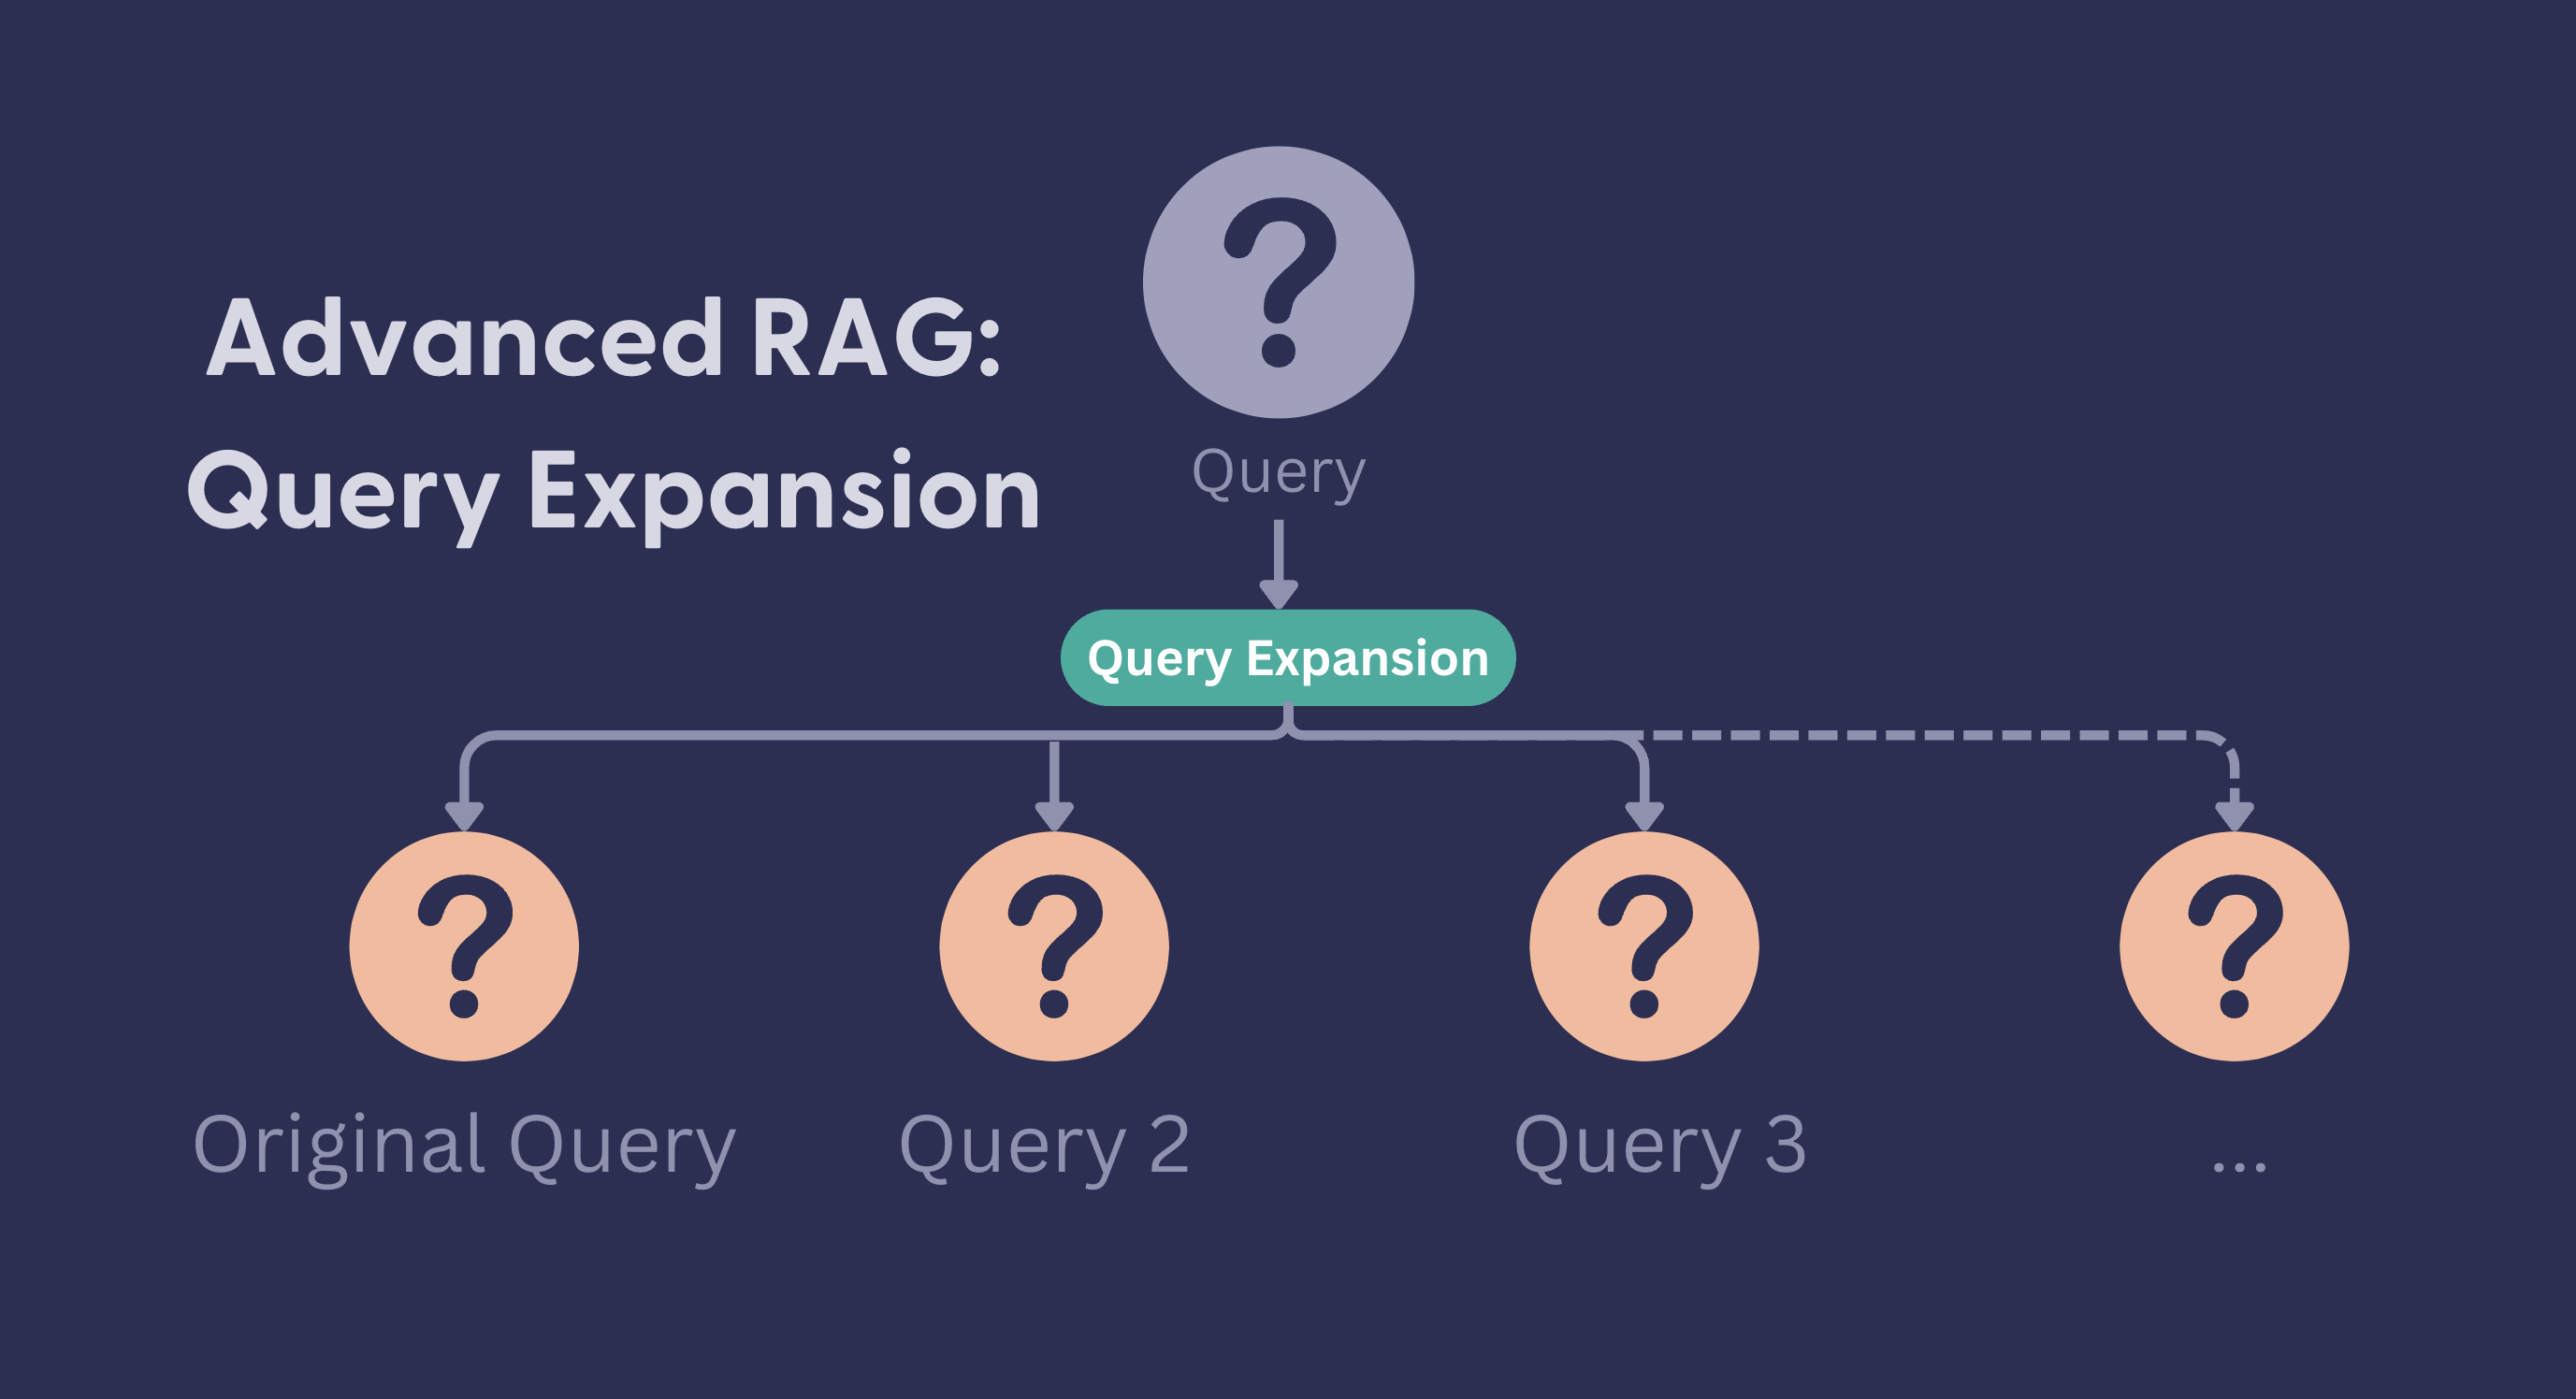

In [ ]:
question = "What are the principles behind wind turbines?"

In [ ]:
# Query Expansion for Document Retrieval
query_enhancement = f"""
You are an expert in information retrieval systems, particularly skilled in enhancing queries for document search efficiency.
Perform query expansion on the received question by considering alternative phrasings or synonyms commonly used in document retrieval contexts.
If there are multiple ways to phrase the user's question or common synonyms for key terms, provide several reworded versions.

If there are acronyms or words you are not familiar with, do not try to rephrase them.

Return at least 3 versions of the question as a list.
Generate only a list of questions. Do not mention anything before or after the list.

Question:
{question}
"""

In [ ]:
new_question = llm.invoke(query_enhancement)
print(new_question.content)

1. What are the fundamental concepts of wind turbine technology?
2. What are the key principles governing the operation of wind turbines?
3. What are the underlying theories related to wind turbine design and function?


In [ ]:
for q in new_question.content.split("\n"):
  for resp in ret.invoke(q):
    print(resp)
  print("="*100)

page_content='Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.'
page_content='Energy storage technologies are critical to manage the intermittent nature of solar and wind energy.'
page_content='Solar power harnesses the energy from the sunlight. Advances in photovoltaic technology have reduced costs significantly.'
page_content='Renewable energy is derived from natural processes that are replenished constantly. It includes sources like solar and wind.'
page_content='Wind energy is generated by converting the kinetic energy of wind into electricity using turbines.'
page_content='Energy storage technologies are critical to manage the intermittent nature of solar and wind energy.'
page_content='Renewable energy is derived from natural processes that are replenished constantly. It includes sources like solar and wind.'
page_content='Solar power harnesses the energy from the sunlight. Advances in photovoltaic technology have reduced costs si

Here we can observe there are 5 unique documents, so we combine them and use these 5 uniques documents for forming the final answer